<a href="https://colab.research.google.com/github/NeelPatil/ML-Projects/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing  libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import KFold,cross_val_score



In [ ]:
#importing data
from google.colab import files
uploaded = files.upload()

Saving data-breastCancer.csv to data-breastCancer.csv


In [ ]:
# Read data 
data = pd.read_csv('data-breastCancer.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
#checking for the datatypes, non-null counts and columnname
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Checking statistics of dataset using transpose function
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
#Renaming the columns 
def rename(data):
  data.columns = [c.replace(' ', '_') for c in data.columns]
  return data

In [ ]:
#Deleting column and setting index
data.set_index(['id'], inplace=True)
data = rename(data)
del data['Unnamed:_32']

In [ ]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [ ]:
#Checking missing values
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#Converting the diagnosis column's values of B to 0s and M to 1s
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

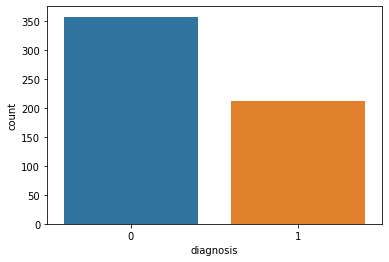

In [ ]:
sb.countplot(x='diagnosis', data=data)

In [ ]:
X = data.drop(labels='diagnosis', axis=1)
y = data['diagnosis']

In [ ]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Decision trees represented by n estimators and defining Randomforest model

RFModel = RandomForestClassifier(n_estimators = 10)
RFModel.fit(X_train,y_train)
Y_Predict = RFModel.predict(X_test)

print(Y_Predict)

[0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1]


In [ ]:
#Calculating AUC and ROC Score
RFModel.score(X_test,y_test)

0.956140350877193

In [ ]:
#Calculating cross validation score and accuracy
n = KFold(n_splits=6)
RFModel2 = RFModel.fit(X_train,y_train)
AUC_ROC_Score = cross_val_score(RFModel2,X_train,y_train, cv = n)
for i in range(0,len(AUC_ROC_Score)):
    print("cross validation {0}: {1: 0.3f}".format(i,AUC_ROC_Score[i]))
    
print("Accuracy {0} ".format(AUC_ROC_Score.mean()))

cross validation 0:  1.000
cross validation 1:  0.974
cross validation 2:  0.961
cross validation 3:  0.934
cross validation 4:  0.961
cross validation 5:  0.933
Accuracy 0.9603801169590643 


In [ ]:
# Folds shows number of folds
Folds = 6  
i=1
KF = KFold(n_splits=Folds, random_state=None)
RFModel = RandomForestClassifier()
lab_enc = preprocessing.LabelEncoder()


Confusion Matrix for 1 classification 
Accuracy is  0.9052631578947369


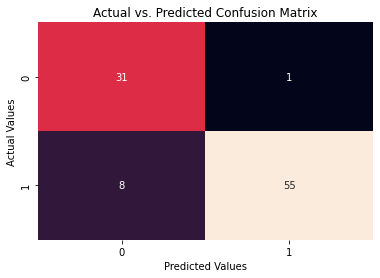


[[31  1]
 [ 8 55]]
Confusion Matrix for 2 classification 
Accuracy is  0.9052631578947369


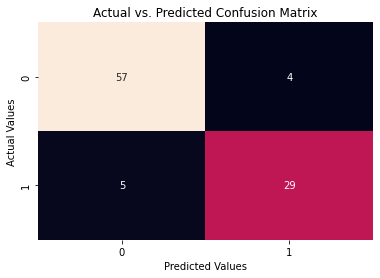


[[57  4]
 [ 5 29]]
Confusion Matrix for 3 classification 
Accuracy is  0.9894736842105263


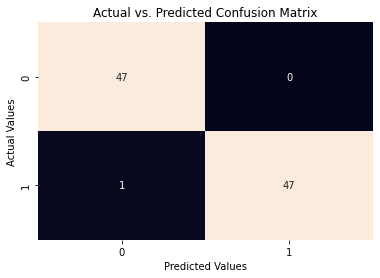


[[47  0]
 [ 1 47]]
Confusion Matrix for 4 classification 
Accuracy is  0.9789473684210527


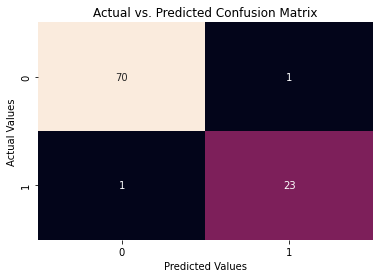


[[70  1]
 [ 1 23]]
Confusion Matrix for 5 classification 
Accuracy is  0.9578947368421052


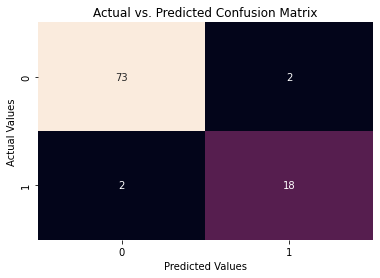


[[73  2]
 [ 2 18]]
Confusion Matrix for 6 classification 
Accuracy is  0.9680851063829787


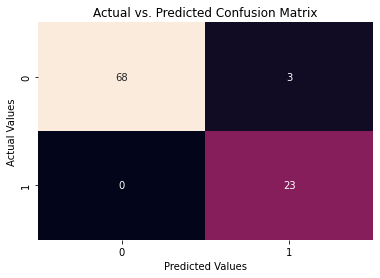


[[68  3]
 [ 0 23]]


In [ ]:
#Generating Confusion matrix and accuracy for every classification

for train_index , test_index in KF.split(X,y):
    X_TrainingData , X_TestingData = X.iloc[train_index] , X.iloc[test_index]
    Y_TrainingData , Y_TestingData = y.iloc[train_index] , y.iloc[test_index]
    
    Y_TrainingData_encoded = lab_enc.fit_transform(Y_TrainingData)
    RFModel.fit(X_TrainingData,Y_TrainingData_encoded)
    Y_Prediction = RFModel.predict(X_TestingData)
    Y_Prediction_encoded = lab_enc.fit_transform(Y_Prediction)
    Y_TestingData_encoded = lab_enc.fit_transform(Y_TestingData)
    
    RFModel.score(X_TestingData,Y_Prediction)
    result = confusion_matrix(Y_TestingData_encoded, Y_Prediction_encoded)
    print("Confusion Matrix for {0} classification ".format(i))
    print("Accuracy is ",RFModel.score(X_TestingData,Y_TestingData))
    i=i+1
    
    sb.heatmap(result, annot=True, fmt='d', cbar=False)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Actual vs. Predicted Confusion Matrix')
    plt.show()
    print("")
    print(result)

In [ ]:
#Generating Confusion Matrix,Classification Report,Accuracy Score
Output = confusion_matrix(Y_TestingData, Y_Prediction)
print("Confusion Matrix:")
print(Output)
Output1 = classification_report(Y_TestingData, Y_Prediction)
print("Classification Report:",)
print(Output1) 
Output2 = accuracy_score(Y_TestingData,Y_Prediction)
print("Accuracy of RandomForest Model",Output2)


Confusion Matrix:
[[68  3]
 [ 0 23]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        71
           1       0.88      1.00      0.94        23

    accuracy                           0.97        94
   macro avg       0.94      0.98      0.96        94
weighted avg       0.97      0.97      0.97        94

Accuracy of RandomForest Model 0.9680851063829787


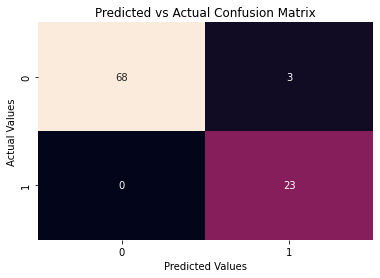

In [ ]:
Matrix = confusion_matrix(Y_TestingData, Y_Prediction)
sb.heatmap(Matrix, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual Confusion Matrix')
plt.show()

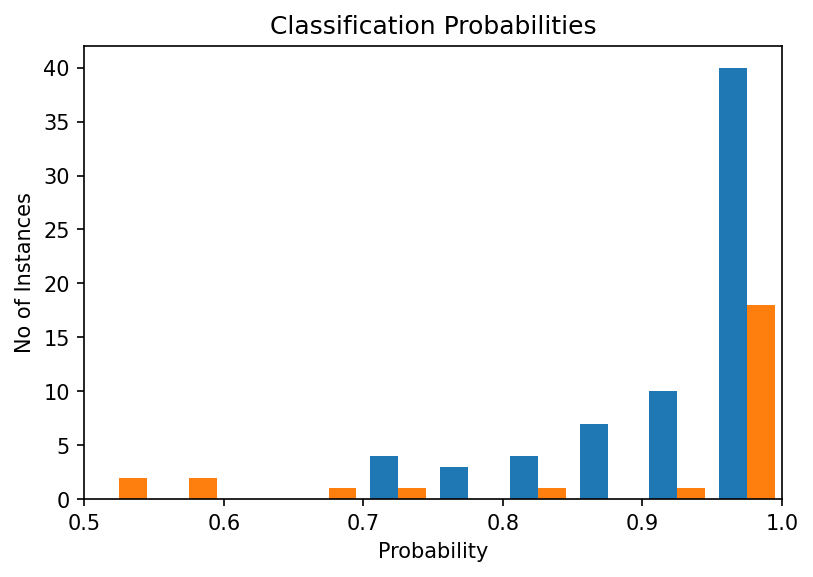

In [ ]:
# Probability Distribution
Probability = RFModel.predict_proba(X_TestingData)

plt.figure(dpi=150)
plt.hist(Probability, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('No of Instances')
plt.xlim([0.5, 1.0])
plt.show()

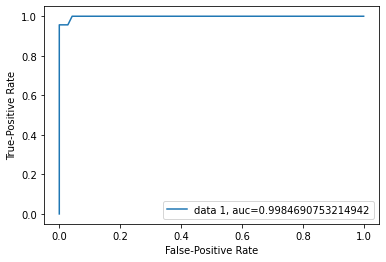

In [ ]:
#Plotting ROC curve
from sklearn.metrics import roc_curve, auc
Y_Prediction_probability = RFModel.predict_proba(X_TestingData)[::,1]
False_Positive_Rate, True_Positive_Rate, _ = roc_curve(Y_TestingData,  Y_Prediction_probability)
Auc = auc(False_Positive_Rate, True_Positive_Rate)
plt.plot(False_Positive_Rate,True_Positive_Rate,label="data 1, auc="+str(Auc))
plt.legend(loc=4)
plt.xlabel('False-Positive Rate')
plt.ylabel('True-Positive Rate')
plt.show()